In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv(r"C:\Users\User\Desktop\train.csv")
X_test = pd.read_csv(r"C:\Users\User\Desktop\test.csv")
X.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [3]:
y = X['Attrition']
X.drop(['Attrition'], axis =1, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
X.drop(columns='Id',inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
obj_dict_train={obj_col: list(X_train[obj_col].unique()) for obj_col in X_train.select_dtypes(include='object')}
obj_dict_train

{'BusinessTravel': ['Travel_Frequently', 'Non-Travel', 'Travel_Rarely'],
 'Department': ['Sales', 'Research & Development', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Medical',
  'Other',
  'Technical Degree',
  'Marketing',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Sales Executive',
  'Research Scientist',
  'Laboratory Technician',
  'Manager',
  'Manufacturing Director',
  'Sales Representative',
  'Healthcare Representative',
  'Human Resources',
  'Research Director'],
 'MaritalStatus': ['Divorced', 'Single', 'Married'],
 'OverTime': ['No', 'Yes']}

In [6]:
obj_dict_valid={obj_col: list(X_valid[obj_col].unique()) for obj_col in X_valid.select_dtypes(include='object')}
obj_dict_valid

{'BusinessTravel': ['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'],
 'Department': ['Sales', 'Research & Development', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Technical Degree',
  'Medical',
  'Other',
  'Marketing',
  'Human Resources'],
 'Gender': ['Female', 'Male'],
 'JobRole': ['Sales Representative',
  'Laboratory Technician',
  'Sales Executive',
  'Research Scientist',
  'Manufacturing Director',
  'Research Director',
  'Human Resources',
  'Manager',
  'Healthcare Representative'],
 'MaritalStatus': ['Single', 'Married', 'Divorced'],
 'OverTime': ['Yes', 'No']}

In [7]:
label_col = ['BusinessTravel', 'OverTime']     
hotencode_col = list(set(X.select_dtypes(include='object').columns)-set(label_col))  

In [8]:
X_train = pd.concat([X_train, pd.get_dummies(X_train[hotencode_col])], axis=1)
X_valid = pd.concat([X_valid, pd.get_dummies(X_valid[hotencode_col])], axis=1)
X_train.drop(hotencode_col, axis=1, inplace=True)
X_valid.drop(hotencode_col,axis=1,inplace=True)

X_test = pd.concat([X_test, pd.get_dummies(X_test[hotencode_col])], axis=1)
X_test.drop(hotencode_col, axis=1, inplace=True)

In [9]:
cat1 = pd.Categorical(X_train.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True)
X_train['BusinessTravel'] = labels1

cat2 = pd.Categorical(X_train.OverTime, categories=['No','Yes'], ordered=True)
labels2, unique2 = pd.factorize(cat2, sort=True)
X_train['OverTime'] = labels2

cat_1 = pd.Categorical(X_valid.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels_1, unique_1 = pd.factorize(cat_1, sort=True)
X_valid['BusinessTravel'] = labels_1

cat_2 = pd.Categorical(X_valid.OverTime, categories=['No','Yes'], ordered=True)
labels_2, unique_2 = pd.factorize(cat_2, sort=True)
X_valid['OverTime'] = labels_2

cat_test1 = pd.Categorical(X_test.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels_test1, unique_test1 = pd.factorize(cat_test1, sort=True)
X_test['BusinessTravel'] = labels_test1

cat_test2 = pd.Categorical(X_test.OverTime, categories=['No','Yes'], ordered=True)
labels_test2, unique_test2 = pd.factorize(cat_test2, sort=True)
X_test['OverTime'] = labels_test2

In [10]:
X_train.nunique()

Age                                   43
BusinessTravel                         3
DistanceFromHome                      29
Education                              5
EmployeeNumber                       745
EnvironmentSatisfaction                4
JobInvolvement                         4
JobSatisfaction                        4
MonthlyIncome                        715
NumCompaniesWorked                    10
OverTime                               2
PercentSalaryHike                     15
PerformanceRating                      2
StockOptionLevel                       4
TotalWorkingYears                     39
TrainingTimesLastYear                  7
YearsAtCompany                        33
YearsInCurrentRole                    19
YearsSinceLastPromotion               16
YearsWithCurrManager                  17
CommunicationSkill                     5
Behaviour                              1
Department_Human Resources             2
Department_Research & Development      2
Department_Sales

In [11]:
num_cols = [col for col in X_train.columns if X_train[col].nunique()>5]

In [12]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler(copy=False)
scaled_train = pd.DataFrame(num_scaler.fit_transform(X_train[num_cols]))
scaled_valid = pd.DataFrame(num_scaler.transform(X_valid[num_cols]))
scaled_test = pd.DataFrame(num_scaler.transform(X_test[num_cols]))
scaled_test.columns  = num_cols
scaled_train.columns = num_cols
scaled_valid.columns = num_cols
scaled_train.index=X_train.index
scaled_valid.index=X_valid.index
scaled_test.index=X_test.index

In [13]:
X_train.drop(columns = num_cols, inplace=True)
X_valid.drop(columns = num_cols, inplace=True)
X_test.drop(columns = num_cols, inplace =True)
X_train = pd.concat([X_train, scaled_train], axis =1)
X_valid = pd.concat([X_valid, scaled_valid], axis =1)
X_test = pd.concat([X_test, scaled_test], axis =1)

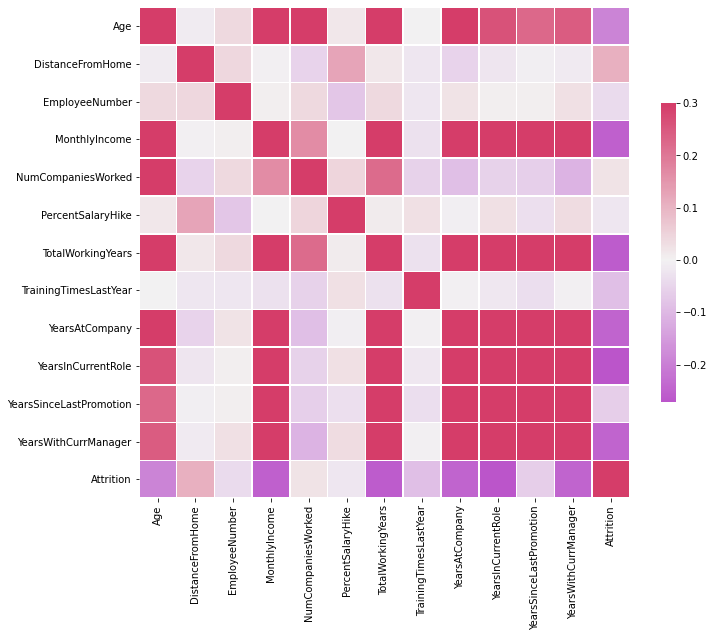

In [14]:
data_pair = pd.concat([X_train[num_cols],y_train], axis=1)
corr_matrix = data_pair.corr()
cmap = sns.diverging_palette(300, 0, as_cmap=True)
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score

In [16]:
num_iters=np.arange(200,501,50)
C = np.arange(0.1,3,0.1, dtype=np.float32)
arg=[]
for i in C:
    for j in num_iters: arg.append((j,i))


In [17]:
def model(arg):
    num_iters = arg[0]
    C=arg[1]
    lr=LogisticRegression(solver='liblinear', max_iter=num_iters,C=C, verbose=0, random_state=7)
    lr.fit(X_train,y_train)
    predictions = lr.predict(X_valid)
    return roc_auc_score(y_valid,predictions)

In [18]:
for params in arg:
    score = model(params)
    print("C={}, iterations={} : {}".format(params[1],params[0],score))

C=0.10000000149011612, iterations=200 : 0.7778531925590749
C=0.10000000149011612, iterations=250 : 0.7778531925590749
C=0.10000000149011612, iterations=300 : 0.7778531925590749
C=0.10000000149011612, iterations=350 : 0.7778531925590749
C=0.10000000149011612, iterations=400 : 0.7778531925590749
C=0.10000000149011612, iterations=450 : 0.7778531925590749
C=0.10000000149011612, iterations=500 : 0.7778531925590749
C=0.20000000298023224, iterations=200 : 0.7988687782805429
C=0.20000000298023224, iterations=250 : 0.7988687782805429
C=0.20000000298023224, iterations=300 : 0.7988687782805429
C=0.20000000298023224, iterations=350 : 0.7988687782805429
C=0.20000000298023224, iterations=400 : 0.7988687782805429
C=0.20000000298023224, iterations=450 : 0.7988687782805429
C=0.20000000298023224, iterations=500 : 0.7988687782805429
C=0.30000001192092896, iterations=200 : 0.7988687782805429
C=0.30000001192092896, iterations=250 : 0.7988687782805429
C=0.30000001192092896, iterations=300 : 0.79886877828054

C=2.299999952316284, iterations=500 : 0.7967320261437908
C=2.3999998569488525, iterations=200 : 0.7967320261437908
C=2.3999998569488525, iterations=250 : 0.7967320261437908
C=2.3999998569488525, iterations=300 : 0.7967320261437908
C=2.3999998569488525, iterations=350 : 0.7967320261437908
C=2.3999998569488525, iterations=400 : 0.7967320261437908
C=2.3999998569488525, iterations=450 : 0.7967320261437908
C=2.3999998569488525, iterations=500 : 0.7967320261437908
C=2.5, iterations=200 : 0.7967320261437908
C=2.5, iterations=250 : 0.7967320261437908
C=2.5, iterations=300 : 0.7967320261437908
C=2.5, iterations=350 : 0.7967320261437908
C=2.5, iterations=400 : 0.7967320261437908
C=2.5, iterations=450 : 0.7967320261437908
C=2.5, iterations=500 : 0.7967320261437908
C=2.5999999046325684, iterations=200 : 0.7967320261437908
C=2.5999999046325684, iterations=250 : 0.7967320261437908
C=2.5999999046325684, iterations=300 : 0.7967320261437908
C=2.5999999046325684, iterations=350 : 0.7967320261437908
C=2.

In [19]:
lr_final = LogisticRegression( solver='liblinear',C=1.8, max_iter=300,random_state=7)
lr_final.fit(X_train,y_train)
pred_lr = lr_final.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid,pred_lr)

0.8717278364337189

In [20]:
feature_weights = np.array(lr_final.coef_).reshape(-1)

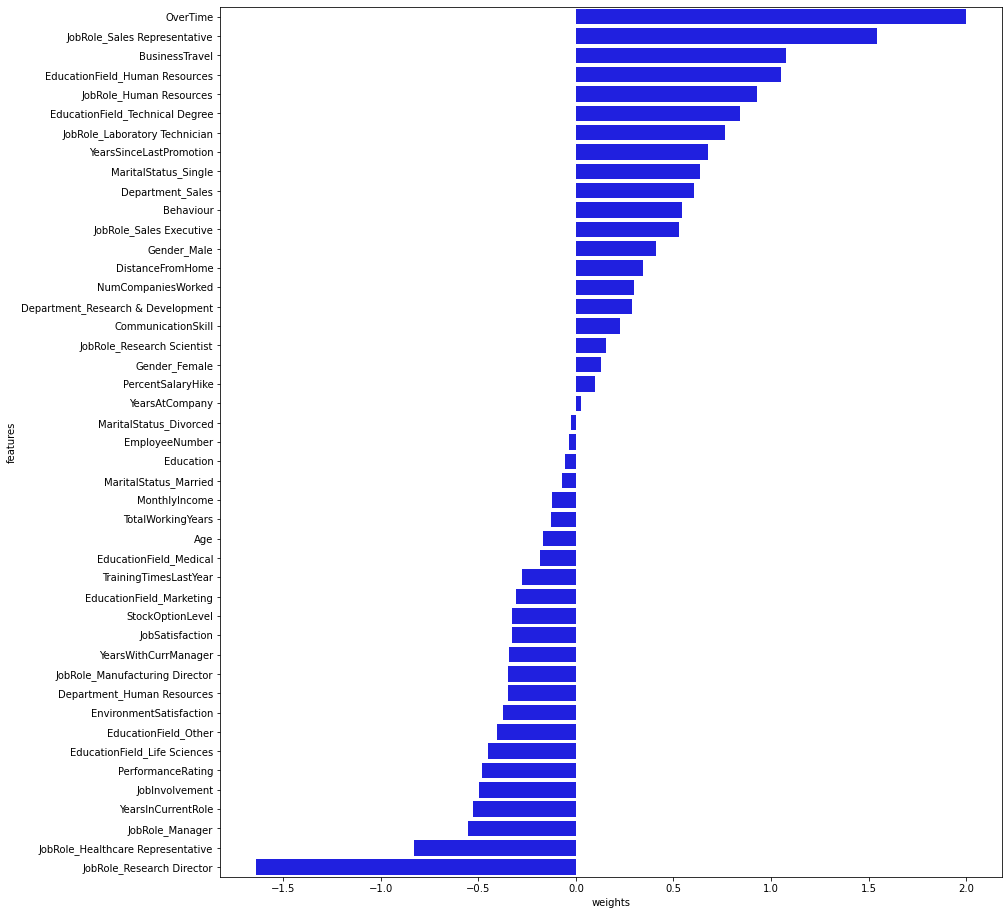

In [21]:
feature_val = pd.DataFrame({'features':X_train.columns, 'weights':feature_weights})
feature_val.sort_values(by='weights', ascending=False, inplace=True)
plt.figure(figsize=(14,16))
sns.barplot(y='features',x='weights',data=feature_val,color='blue')
plt.show()

In [22]:
less_weight_cols= feature_val[abs(feature_val.weights)<0.1].features.to_list()
less_weight_cols

['PercentSalaryHike',
 'YearsAtCompany',
 'MaritalStatus_Divorced',
 'EmployeeNumber',
 'Education',
 'MaritalStatus_Married']

In [24]:
X_train.drop(columns=less_weight_cols,inplace=True)

X_test.drop(columns=less_weight_cols,inplace=True)

In [25]:
lr_final.fit(X_train,y_train)
lr_final

LogisticRegression(C=1.8, max_iter=300, random_state=7, solver='liblinear')

In [26]:
final_pred = lr_final.predict_proba(X_test.drop(columns='Id'))[:,1]
output = pd.concat([X_test.Id,pd.Series(final_pred)], axis=1)
output.columns=['Id','Attrition']
output.set_index('Id')
output.to_csv("submission.csv",index=False)